# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [29]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

<BarContainer object of 100 artists>

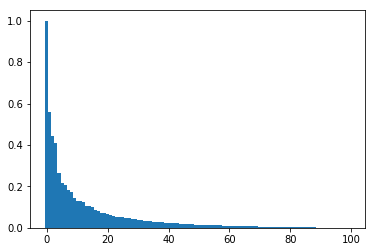

In [30]:
# Samples corresponding to the last digit of your roll number (plot a)
Roll_no = 20171058
digit_data = train_data[train_labels==Roll_no%10]
cov = np.cov(digit_data,rowvar=False)
eigen_values,eigen_vectors = np.linalg.eig(cov)
eigen_values = np.real(eigen_values)
eigen_values.sort()
eigen_values = eigen_values[::-1]

eigen_values = eigen_values[0:100]
eigen_values = (eigen_values-min(eigen_values))/(max(eigen_values)-min(eigen_values))
index = np.arange(100)
plt.bar(index, eigen_values,width=1.0)

<BarContainer object of 100 artists>

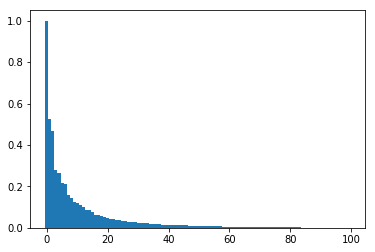

In [31]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
digit_data = train_data[train_labels==(Roll_no+1)%10]
cov = np.cov(digit_data,rowvar=False)
eigen_values,eigen_vectors = np.linalg.eig(cov)
eigen_values = np.real(eigen_values)
eigen_values.sort()
eigen_values = eigen_values[::-1]

eigen_values = eigen_values[0:100]
eigen_values = (eigen_values-min(eigen_values))/(max(eigen_values)-min(eigen_values))
index = np.arange(100)
plt.bar(index, eigen_values,width=1.0)

<BarContainer object of 100 artists>

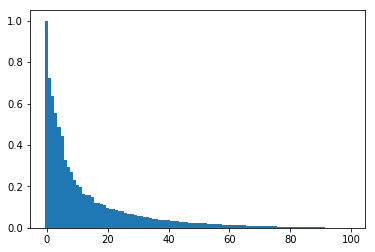

In [32]:
# All training data (plot c)
cov = np.cov(train_data,rowvar=False)
eigen_values,eigen_vectors = np.linalg.eig(cov)
eigen_values = np.real(eigen_values)

eigen_values.sort()
eigen_values = eigen_values[::-1]

eigen_values = eigen_values[0:100]
eigen_values = (eigen_values-min(eigen_values))/(max(eigen_values)-min(eigen_values))
index = np.arange(100)
plt.bar(index, eigen_values,width=1.0)

<BarContainer object of 100 artists>

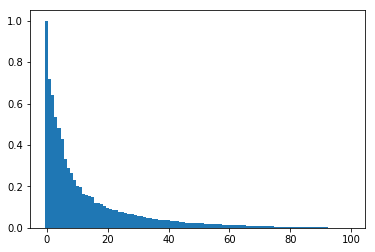

In [33]:
# Randomly selected 50% of the training data (plot d)
import random
indices = random.sample(range(train_data.shape[0]), int(train_data.shape[0]/2))
half_data = train_data[indices]

cov = np.cov(half_data,rowvar=False)
eigen_values,eigen_vectors = np.linalg.eig(cov)
eigen_values = np.real(eigen_values)

eigen_values.sort()
eigen_values = eigen_values[::-1]

eigen_values = eigen_values[0:100]
eigen_values = (eigen_values-min(eigen_values))/(max(eigen_values)-min(eigen_values))
index = np.arange(100)
plt.bar(index, eigen_values,width=1.0)

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)
- The plots a and b correspond to different labels which means the features which affect them are different. Due to this, the plots appear to be slightly different but since they are of similar ranks, the plots look similar.

- The plot for b is from a specific class whereas the plot from c is for the entire data

- Seeing the eigenvalue spectrums, the first 2 plots appear to have a rank around 80 whereas the third one appears to have a rank around 90
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)

- There can be a possible of 256^784 total images since each variable has a range of values from 0 to 255.
- (7000/(256^784))x100 which is very close to 0
- The matrix would be of full rank and we will have all 784 eigenvalues as non-zero. So the plot will go till 784.

---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)

The orthonormal matrix will just rotate the eigenvectors but will have no effect on the magnitude of eigenvalues. Hence, the eigenvalue spectrum should remain the same(or similar).

---

<BarContainer object of 100 artists>

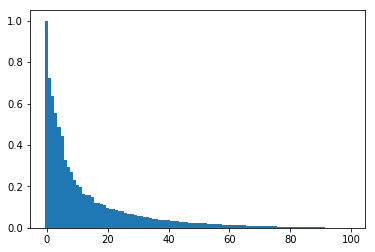

In [34]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
rand_mat = np.random.rand(784,784)
q,r = np.linalg.qr(rand_mat)
ortho = q

temp_train = np.matmul(ortho,train_data.T)

cov = np.cov(temp_train)
eigen_values,eigen_vectors = np.linalg.eig(cov)
eigen_values = np.real(eigen_values)

eigen_values = eigen_values[0:100]
eigen_values = (eigen_values-min(eigen_values))/(max(eigen_values)-min(eigen_values))
index = np.arange(100)
plt.bar(index, eigen_values,width=1.0)

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)

The points will be projected across these 1 or 2 dimensions and the other eigenvalues will become zero. Therefore the eigenvalue spectrum will be 0 except for the first 1 or 2 values.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

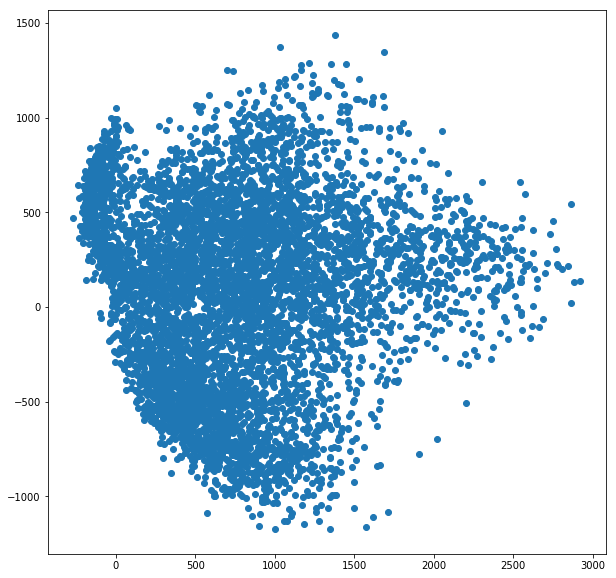

In [35]:
# Plotting code here
cov = np.cov(train_data,rowvar=False)
eigen_values,eigen_vectors = np.linalg.eig(cov)
eigen_values = np.real(eigen_values)
eigen_vectors = eigen_vectors.real
fig = plt.figure(figsize = (10,10))
x = np.matmul(train_data,eigen_vectors[:,0])
y = np.matmul(train_data,eigen_vectors[:,1])
plt.scatter(x,y)

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [3]:
# Print accuracy on the test set using MLE
def gaussian(mean, cov, vec):
    power = ((vec-mean)@np.linalg.pinv(cov)@((vec-mean).T))*(-0.5)
    eig_values = np.real(np.linalg.eigvals(cov))
    ev1 = [x for x in eig_values if x>1e-12]
    det_log = (np.sum(np.log(ev1)))/2
    return power-det_log
    
means = np.array([np.mean(train_data[train_labels==i],axis=0) for i in range(0,10)])
covs = np.array([np.cov(train_data[train_labels==i],rowvar=False)for i in range(0,10)])

correct = 0
for index,vec in enumerate(test_data):
    gaussians = [ gaussian(means[i],covs[i],vec) for i in range(0,10) ]
    if np.argsort(gaussians)[-1] == int(test_labels[index]):
        correct+=1
print("MLE accuracy:",correct/10)

MLE accuracy: 74.2


In [4]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
# Since no information is given about the classes we assume them to have same prior i.e. 0.1
prior = 0.1

def gaussian(mean, cov, vec):
    power = ((vec-mean)@np.linalg.pinv(cov)@((vec-mean).T))*(-0.5)
    eig_values = np.real(np.linalg.eigvals(cov))
    ev1 = [x for x in eig_values if x>1e-12]
    det_log = (np.sum(np.log(ev1)))/2
    return power - det_log + np.log(prior)

means = np.array([np.mean(train_data[train_labels==i],axis=0) for i in range(0,10)])
covs = np.array([np.cov(train_data[train_labels==i],rowvar=False)for i in range(0,10)])

correct = 0
for index,vec in enumerate(test_data):
    gaussians = [ gaussian(means[i],covs[i],vec) for i in range(0,10) ]
    if np.argsort(gaussians)[-1] == int(test_labels[index]):
        correct+=1
print("MAP accuracy:",correct/10)


MAP accuracy: 74.2


In [16]:
# Print accuracy using Bayesian pairwise majority voting method
from sys import stdout
pinv = {}

means = np.array([np.mean(train_data[train_labels==i],axis=0) for i in range(0,10)])
covs = np.array([np.cov(train_data[train_labels==i],rowvar=False)for i in range(0,10)])


for i in range(10):
    for j in range(i+1,10):
        cov_avg = (covs[i]+covs[j])/2
        pinv[(i,j)] = np.linalg.pinv(cov_avg)

def gaussian(mean, i, j, vec):
    power = ((vec-mean)@pinv[(i,j)]@((vec-mean).T))*(-0.5)
    return power

correct = 0
for index,vec in enumerate(test_data):
    maxi=0
    stdout.write("\r{}".format(index))
    for i in range(1,10):
        g1 = gaussian(means[maxi],maxi,i,vec)
        g2 = gaussian(means[i],maxi,i,vec)
        if( g2>g1 ):
            maxi = i
    if maxi==test_labels[index]:
        correct+=1

print("\n")
print("Accuracy = ",correct/10)

999

Accuracy =  79.9


In [17]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
from sys import stdout
pinv = {}

means = np.array([np.mean(train_data[train_labels==i],axis=0) for i in range(0,10)])

correct = 0
for index,vec in enumerate(test_data):
    maxi=0
    stdout.write("\r{}".format(index))
    for i in range(1,10):
        d1 = np.linalg.norm(vec-means[maxi])
        d2 = np.linalg.norm(vec-means[i])
        if( d2<d1 ):
            maxi = i
    if maxi==test_labels[index]:
        correct+=1

print("\n")
print("Accuracy = ",correct/10)

999

Accuracy =  77.0


### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)

MLE and MAP give same performance due to the same values of prior probability for each class. The preformance of Simple Perpendicular Bisector majority voting method is poor when compared to Bayesian pairwise majority voting method because eucledian distance is not a good measure of similarity between 2 points when the covariance matrices are different which was the case here.

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [10]:
# Your code here
# Print accuracies with K = 1, 3, 7

def knn(k):
    correct=0
    for index,vec in enumerate(test_data):
        norms = np.sqrt(np.sum(np.square(train_data-vec),axis=1))
        sort_indices = np.argsort(norms)
        nn = sort_indices[0:k]
        temp = train_labels[nn].astype(int)
        count = np.bincount(temp)
        if np.argmax(count) == test_labels[index]:
            correct+=1
    return correct/10

print(knn(1))
print(knn(3))
print(knn(7))


90.7
91.6
91.6


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

- All accuracies are not same because we consider different no. of neigbouring points. For small k, some closeby points may be missed whereas for very large k, there could be some false positives.

- As we keep on increasing k, the accuracy keeps on increasing but after some point this accuracy converges to some value and there is no further increase in this value. This is chosen as k for our algorithm.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [6]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [36]:
train_with_mixed = np.concatenate((train_data,mixed_data))
k=3
nn_set = set()
for index,vec in enumerate(train_data):
        norms = np.sqrt(np.sum(np.square(train_with_mixed-vec),axis=1))
        sort_indices = np.argsort(norms)
        nn = sort_indices[1:k+1]
        for ele in nn:
            if ele>=6000:
                nn_set.add(ele)
print("No of outliers in mixed data",20-len(nn_set))

No of outliers in mixed data 8


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)

- Convert labels to neatness score.
- Find the k nearest neigbors for each test point and take the mean of their neatness scores as the predicted value of the neatness score for the test point. 
- Take mean absolute error using the actual neatness score for all test points.

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [13]:
# Your code here
k=3
mean_abs_error = 0
errors = []

for index,vec in enumerate(test_data):
        norms = np.sqrt(np.sum(np.square(train_data-vec),axis=1))
        sort_indices = np.argsort(norms)
        nn = sort_indices[0:k]
        temp = train_labels[nn]/10
        errors.append(np.abs((test_labels[index]/10)-np.mean(temp)))
        
np.mean(errors)

0.03773333333333335

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---